#### Problem Statement<br>
Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

In [622]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import datetime as dt

<b>Importing data</b>

In [623]:
netflix=pd.read_csv("C:/Users/Apurva/Desktop/netflix.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<b>Shape of data</b>

In [624]:
netflix.shape

(8807, 12)

<b>Names of all columns</b>

In [625]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<b>Datatypes of all columns</b>

In [626]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<b>Renaming "listed_in" as "genre" for better understanding</b>

In [627]:
netflix.rename(columns={"listed_in":"genre"},inplace=True)
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

<b>Checking for duplicate rows</b>

In [628]:
netflix=netflix.drop_duplicates()
netflix.shape

(8807, 12)

<b>Missing data detection</b>

In [629]:
missing=netflix.isnull() 
print(missing.sum()) #checking how many values are missing
missing_p=missing.sum()*100/len(netflix)
missing_p.sort_values(ascending=False) #checking percentage of missing data in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
genre              0
description        0
dtype: int64


director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
genre            0.000000
description      0.000000
dtype: float64

### Inference<br>
- There are <b>8807 rows x 12 columns</b> in the dataset.
- There are <b>no duplicate rows.</b>
- All 12 columns have meaningful names and can be changed for better understanding.
- <b>29.9%</b> of the values are <b>missing in "director" column.</b>
- <b>9.4%</b> values are <b>missing in "countries" column.</b> 
- <b>9.3%</b> values are <b>missing in "cast" column.</b>
- <b>0.11%</b> i.e 10 values are <b>missing in "date_added" column.</b>
- <b>0.04%</b> i.e. 4 values are <b>missing in "rating" column.</b>
- <b>0.03%</b> i.e. 3 values are <b>missing in "duration" column.</b>

<b>Missing values treatment</b>

- <u>Dropping the rows where "rating" and "duration" are missing</u>

In [630]:
netflix.dropna(subset=["rating", "duration"], how="any",inplace=True) 

In [631]:
print(netflix.shape)
netflix.isnull().sum().sort_values(ascending=False)

(8800, 12)


director        2631
country          830
cast             825
date_added        10
show_id            0
type               0
title              0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

- <u>Changing datatype of "date_added" and handling missing values in the column  </u>

In [632]:
netflix["date_added"] = pd.to_datetime(netflix["date_added"])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [633]:
netflix.describe(datetime_is_numeric=True)

,date_added,release_year
count,8790,8800.000000
mean,2019-05-17 21:44:01.638225408,2014.179886
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.822583


- First "date_added" is 2008-01-01 
- For "release_year" earlier than 2008 we can add 2008-01-01 as "date_added"

In [634]:
netflix.loc[netflix.release_year < 2008, "date_added"] = "2008-01-01"

- For "release_year" later than or equal to 2008 let us change the "date_added" to one year after release_year

In [635]:
df1=netflix.loc[netflix.date_added.isnull(),"release_year"] #finding release_years for shows with date_added unknown

In [636]:
df2=df1.apply(lambda x:dt.datetime(x+1,1,1)) #converting the release_years into date time format

In [637]:
df2

6066   2014-01-01
6174   2019-01-01
6901   2009-01-01
7196   2011-01-01
7254   2013-01-01
7406   2017-01-01
7847   2016-01-01
8182   2016-01-01
Name: release_year, dtype: datetime64[ns]

In [638]:
netflix.loc[netflix.date_added.isnull(), "date_added"] = df2 #replacing null values in "date_added" with obtained values from release_year

In [639]:
netflix.isnull().sum().sort_values(ascending=False) #Checking again for missing values data

director        2631
country          830
cast             825
show_id            0
type               0
title              0
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

- <u>Replacing missing values in "country" column with mode</u>

In [640]:
netflix["country"] = netflix["country"].fillna(netflix["country"].mode()[0])

In [641]:
netflix.isnull().sum().sort_values(ascending=False)

director        2631
cast             825
show_id            0
type               0
title              0
country            0
date_added         0
release_year       0
rating             0
duration           0
genre              0
description        0
dtype: int64

<b>Deriving new columns</b><br>
- <u>Adding "year_added","month_added" and "day_added
" column from "date_added"</u><br>
- <u>Dropping "show_id" as it won't be used in analysis</u>

In [642]:
netflix["year_added"]=netflix["date_added"].dt.year
netflix["month_added"]=netflix["date_added"].dt.month
import calendar
netflix["day_added"]=netflix["date_added"].apply(lambda x: calendar.day_name[x.weekday()])
netflix=netflix.drop("show_id",axis=1)
netflix.shape

(8800, 14)

<b>Value counts for each column</b>

In [643]:
netflix.nunique()

type               2
title           8800
director        4526
cast            7688
country          748
date_added      1692
release_year      74
rating            14
duration         220
genre            514
description     8768
year_added        13
month_added       12
day_added          7
dtype: int64

In [644]:
netflix.describe()

,release_year,year_added,month_added
count,8800.000000,8800.000000,8800.000000
mean,2014.179886,2017.561818,5.958864
std,8.822583,3.803808,3.681043
min,1925.000000,2008.000000,1.000000
25%,2013.000000,2017.000000,3.000000
50%,2017.000000,2019.000000,6.000000
75%,2019.000000,2020.000000,9.000000
max,2021.000000,2021.000000,12.000000


### Inference<br>
- According to the data, Netflix <b>began adding TV shows and Movies in year 2008.</b>
- Earliest released Movie/TV show on Netflix is with <b>release_year 1925.</b>
- Latest released Movie/TV show on Netflix is with <b>release_year 2021.</b>
- <b>25%</b> of the shows/movies are those <b>released after 2019.</b>
- <b>75%</b> of the shows/movies are <b>added on Netflix after 2017.</b>

#### Visual analysis

<AxesSubplot:ylabel='type'>

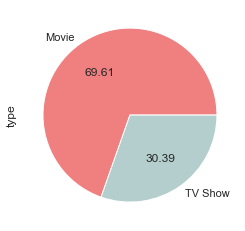

In [645]:
netflix["type"].value_counts().plot(kind="pie",autopct="%.2f",colors=["#F08080","#B4CDCD"])

### Inference<br>
- <b>69.6%</b> of the content consists of <b>movies.</b>
- <b>30.3%</b> of the content consists of <b>TV shows.</b>
- Movie is the popular format of content, so number of movies added should be maintained.
- More TV shows can be added to increase the subscribers.

In [646]:
netflix_country=netflix.copy(deep=True)
country_list= netflix.country.str.split(',')
netflix_country.country = country_list
netflix_country= netflix_country.explode("country")
netflix_country["country"]= netflix_country["country"].str.strip()
netflix_country.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Friday


In [647]:
df = pd.DataFrame(netflix_country["country"].value_counts())
countries = df.reset_index()
countries.columns = ["country name", "counts"]
countries.sort_values("counts",ascending=False,inplace=True)

In [648]:
countries[:10]

,country name,counts
0,United States,4517
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
5,Japan,317
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


[Text(0.5, 1.0, 'Top 10 countries based on number of shows/movies produced')]

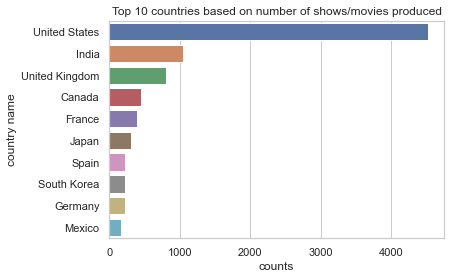

In [649]:
sns.barplot(data=countries[:10],x="counts",y="country name").set(title="Top 10 countries based on number of shows/movies produced")

In [650]:
countries[countries["counts"]<=10].shape[0]

71

In [651]:
countries[(countries["counts"]>10) & (countries["counts"]<=50)].shape[0]

26

In [652]:
countries[(countries["counts"]>50) & (countries["counts"]<=100)].shape[0]

10

In [653]:
countries[countries["counts"]>100].shape[0]

16

### Inference</br>
- <b>Top 10 countries</b> considering highest number of movies/tv shows produced are <b>United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany and Mexico.</b></br>
- Number of movies/tv shows produced is <b>less than or equal to 10 in 71 countries.</b></br>
- Number of movies/tv shows produced is <b>between (10,50] in 26 countries.</b></br>
- Number of movies/tv shows produced is <b>between (50,100] in 10 countries.</b></br>
- Number of movies/tv shows produced is <b>greater than 100 in 16 countries.</b>
- 16 countries contribute the most in production of content, these countries should be focused on to maintain the number of movies/TV shows produced.
- The countries where less content is produced can be a topic of further research to get idea of the untapped potential and make the most of it.

In [654]:
countries_list=['United States','India','Canada','France','United Kingdom','Japan','Spain','South Korea','Germany','Mexico']
top_countries=netflix_country[netflix_country["country"].isin(countries_list)]
top_countries.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,year_added,month_added,day_added
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Friday
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,Friday


type
country        type         
Canada         Movie     319
               TV Show   126
France         Movie     303
               TV Show    90
Germany        Movie     182
               TV Show    44
India          Movie     962
               TV Show    84
Japan          TV Show   198
               Movie     119
Mexico         Movie     111
               TV Show    58
South Korea    TV Show   170
               Movie      61
Spain          Movie     171
               TV Show    61
United Kingdom Movie     534
               TV Show   272
United States  Movie    3188
               TV Show  1329

[Text(0.5, 1.0, 'Distribution of movies and TV shows produced in the top 10 countries')]

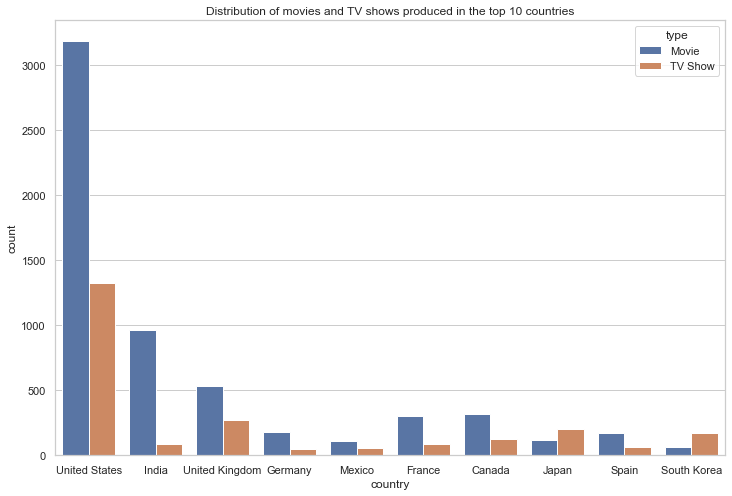

In [655]:
display(top_countries.groupby("country")["type"].value_counts().to_frame())
plt.figure(figsize=(12,8))
sns.countplot(x="country",hue="type",data=top_countries).set(title="Distribution of movies and TV shows produced in the top 10 countries")

### Inference<br>
- Number of <b>TV shows produced is higher than number of movies produced in Japan and South Korea unlike other countries</b> where number of movies produced is higher.
- The <b>gap between movies and shows produced seems to be more than 50%</b> in the countries <b>except Mexico and Japan.</b>
- There is scope to increase number of TV shows produced in India, Germany, Mexico, France and Spain.
- More movies can be produced in South Korea, Japan, Mexico.
- More country specific data and analysis can be used to plan strategy in every country.

In [656]:
constraint=netflix['genre'].apply(lambda x: str(x).split(',')).tolist()
df_new=pd.DataFrame(constraint,index=netflix['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','genre']
df_new['genre']= df_new['genre'].str.strip()
nf_genre=netflix.merge(df_new, on='title', how='inner')
nf_genre=nf_genre.drop('genre_x',axis=1)
nf_genre.rename(columns={"genre_y":"genre"},inplace=True)
nf_genre.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,description,year_added,month_added,day_added,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,9,Saturday,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,TV Mysteries
4,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,2021,9,Friday,Crime TV Shows


In [657]:
top_genres=nf_genre['genre'].value_counts()[:20].to_frame()
top_genres.reset_index(inplace=True)
top_genres.columns=['genre','count']
top_genres

,genre,count
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1350
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


[Text(0.5, 1.0, 'Top 20 genres based on popularity')]

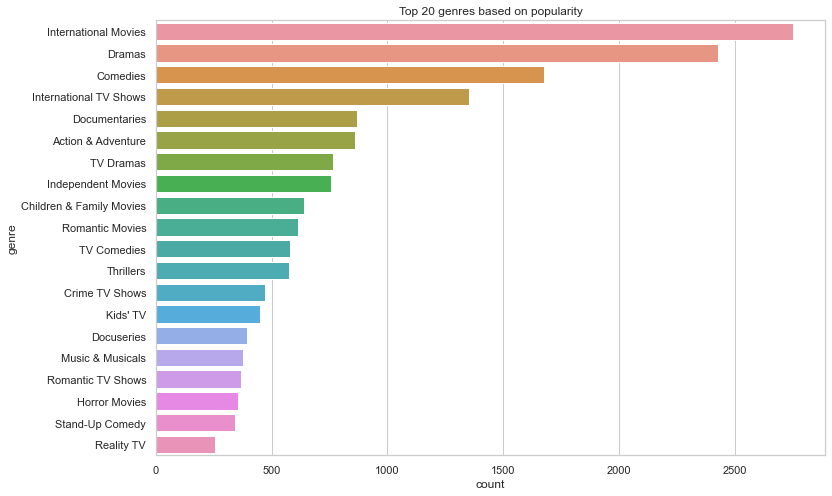

In [658]:
plt.figure(figsize=(12,8))
sns.barplot(x='count',y='genre',data=top_genres).set(title="Top 20 genres based on popularity")

### Inference<br>
- 4 most popular genres are <b>"International movies", "Dramas", "Comedies" and "International TV shows".</b>
- <b>"Documentaries", "Action & Adventure", "TV Dramas", "Independent Movies"</b> are next 4 popular genres followed by <b>"Children & Family movies", "Romantic movies", "TV comedies", and "Thrillers".</b>  
- Strategy should be planned to attract and encourage creators of the popular genres to add their content on Netflix. 

In [659]:
netflix["day_added"].value_counts()

Friday       2303
Tuesday      2065
Thursday     1210
Wednesday    1080
Monday        756
Saturday      738
Sunday        648
Name: day_added, dtype: int64

<AxesSubplot:xlabel='day_added', ylabel='count'>

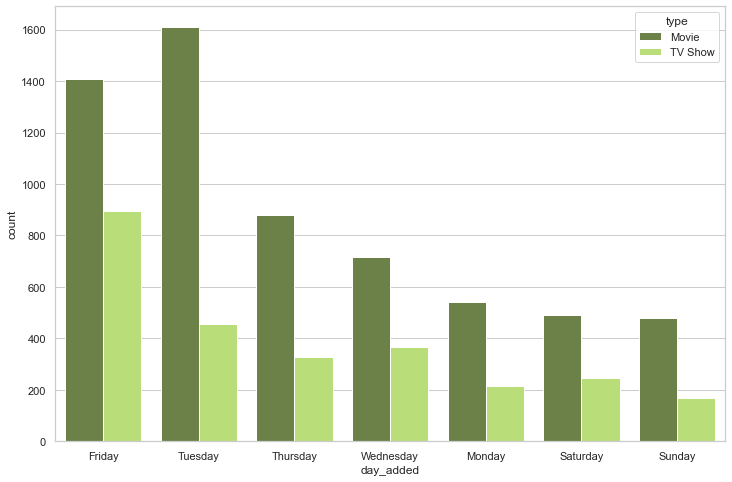

In [660]:
plt.figure(figsize=(12,8))
sns.countplot(x='day_added',hue='type',data=netflix,palette=["#6E8B3D","#BCEE68"],order=netflix['day_added'].value_counts().index)

### Inference<br>
- Most of the content on Netflix is added on Tuesdays and Fridays.
- Least contetnt is added on weekends i.e. Saturday and Sunday.
- More content should be added on weekends.

,year_added,count
0,2019,1737
1,2020,1658
2,2018,1470
3,2021,1287
4,2017,1093
5,2008,1047
6,2016,390
7,2015,78
8,2014,22
9,2013,11


<AxesSubplot:xlabel='year_added', ylabel='count'>

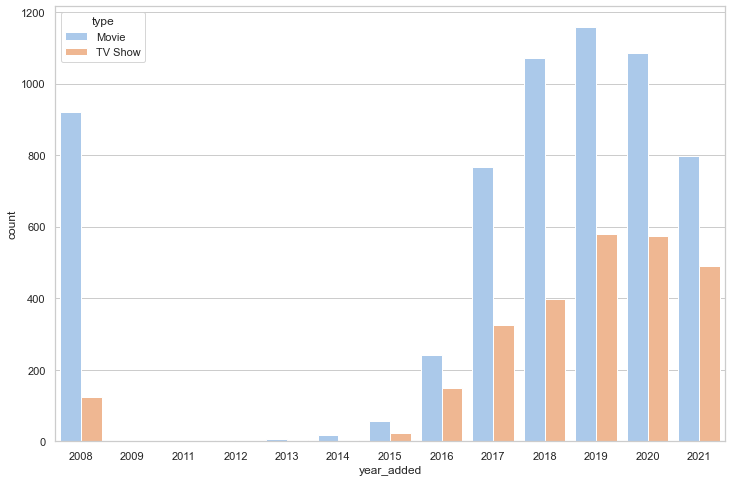

In [661]:
year_data=netflix["year_added"].value_counts().to_frame()
year_data.reset_index(inplace=True)
year_data.columns=["year_added","count"]
display(year_data)
plt.figure(figsize=(12,8))
sns.countplot(x='year_added',hue='type',data=netflix,palette='pastel')

In [662]:
year_data["count"].iloc[[0,1,2,3,4]].mean(axis=0)

1449.0

### Inference<br>
- Most of the content was added in the years <b>2008 and 2017-2021.</b>
- <b>1737 movies/TV shows were added in 2019,</b> being the highest number.
- Number of TV shows added has considerably increased since 2008.
- On an average <b>1449 movies/TV shows are added per year since 2017.</b>
- Number of movies/TV shows added should be maintained every year according to the availability of servers.

In [663]:
bins = [1925,1970,2000,2010,2015,2021]
release_data=netflix.groupby(pd.cut(netflix['release_year'], bins=bins)).release_year.count().to_frame()
release_data.rename(columns = {"release_year":"count"},inplace= True)
release_data

,count
release_year,
"(1925, 1970]",53
"(1970, 2000]",508
"(2000, 2010]",966
"(2010, 2015]",1618
"(2015, 2021]",5654


<AxesSubplot:xlabel='release_year', ylabel='count'>

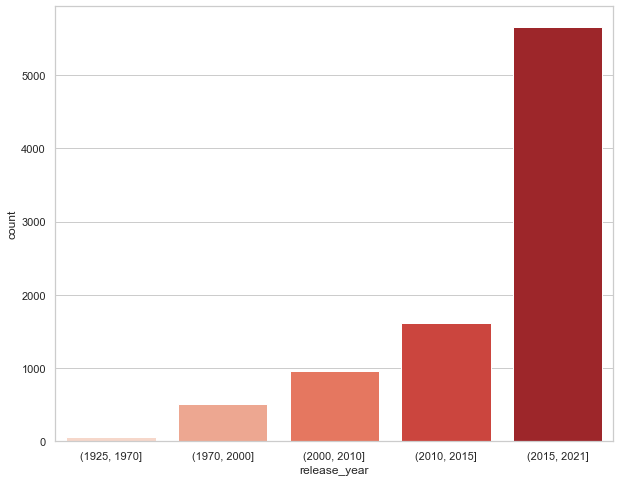

In [664]:
plt.figure(figsize=(10,8))
sns.barplot(x=release_data.index,y='count',data=release_data,palette="Reds")

### Inference<br>
- Almost <b>65% of the content on Netflix is released within last 6 years</b> which tells that recently created content is popular on Netflix.
- Only <b>6% of the added content is released before year 2000.</b> Adding older content can attract more viewers and subscribers.

### Summary of insights<br>
- According to the data, Netflix began adding TV shows and Movies in year 2008.
- <b>25%</b> of the shows/movies are those <b>released after 2019.</b>
- <b>75%</b> of the shows/movies are <b>added on Netflix after 2017.</b>
- <b>69.6%</b> of the content <b>consists of movies.</b>
- <b>30.3%</b> of the content <b>consists of TV shows.</b>
- <b>Top 10 countries</b> considering highest number of movies/tv shows produced are <b>United States, India, United Kingdom, Canada, France, Japan, Spain, South Korea, Germany and Mexico.</b>
- Number of movies/tv <b>shows produced is greater than 100 in 16 countries.</b>
- Number of <b>TV shows produced is higher than number of movies produced in Japan and South Korea unlike other countries</b> where number of movies produced is higher.
- The <b>gap between movies and shows produced seems to be more than 50% in the countries except Mexico and Japan.</b>
- <b>4 most popular genres are "International movies", "Dramas", "Comedies" and "International TV shows".</b>
- Most of the content on Netflix is <b>added on Tuesdays and Fridays.</b>
- <b>Least content is added on weekends i.e. Saturday and Sunday.</b>
- Most of the content was added in the <b>years 2008 and 2017-2021.</b>
- <b>1737 movies/TV shows were added in 2019,</b> being the highest number.
- On an <b>average 1449 movies/TV shows are added per year since 2017</b>
- Almost <b>65% of the content on Netflix is released within last 6 years</b> which tells that recently created content is popular on Netflix.
- Only <b>6% of the added content is released before year 2000.</b> 

### Recommendations<br>
- Movie is the popular format of content, so number of movies added should be maintained.
- More TV shows can be added to increase the subscribers.
- 16 countries contribute the most in production of content, these countries should be focused on to maintain the number of movies/TV shows produced.
- The countries where less content is produced can be a topic of further research to get idea of the untapped potential and make the most of it.
- Strategy should be planned to attract and encourage creators of the popular genres to add their content on Netflix.
- More content should be added on weekends.
- Number of TV shows added has considerably increased since 2008. Adding more TV shows can attract more viewers.
- Number of movies/TV shows added should be maintained every year according to the availability of servers.
- Recently created content is popular on Netflix.More focus on new content will help retain subscribers.
- Adding older content can attract more viewers and subscribers, with different age groups.